In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
egrids_data = pd.read_csv('Data_for_UCI_named.csv')
egrids_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


using the matplotlib and seaborn to make an heat map showing which predictors variable are highly correlated either positve or negative because their is a rule for when dealing with regression problems that is the rule of independency that all predictors
must be independent of each other inorder to prevent mullticollinearity that could affect our results. we could do this checking using the pearson correlation and make it more easy to understand by visualizing it

In [3]:
"""
learnt something new from practicing that pandas makes almost all thing into a dataframe and that you can perform some dataframe function 
that is why used the head function you could also try ndim, size, shape attributes and .tail() function and see the beauty 
of pandas and there is so much more to learn by me as a begineer. :)
"""

egrids_data.corr().head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278


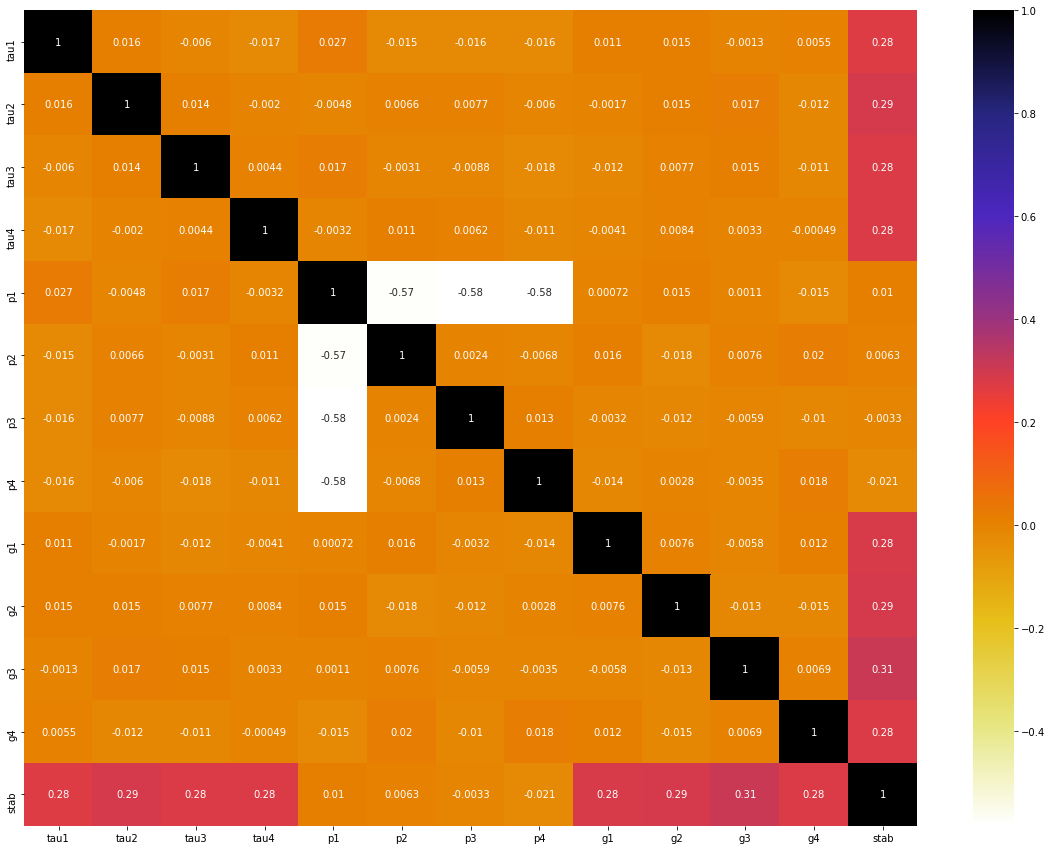

In [4]:
plt.figure(figsize=(20,15))
cor = egrids_data.corr()
sns.heatmap(cor, annot=True , cmap=plt.cm.CMRmap_r)
plt.show()

here we see no correlation between our predictors and it seems fine now we can drop the stab response variable as we where told 

to do in the following cell

In [5]:
egrids_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
egrids_data.drop(columns=['stab'], inplace=True)
#the inplace true makes the dropped column to be updated into our parent dataframe
#without any need to assign the dropping method without the inplace = True into another variable
#but the truth is if we rerun this column we would have an error

In [7]:
egrids_data.head(20)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,unstable


1. now splitting data into a train test split , 

2. standard scaling ,

3. doing cross validation test set,

4. picking the best classifier for now before using boosting techniques but before all these, we could want to create a   function that would help us convert the response column nominal categorical binary classification data into a numerical binary  classification data of zero for unstable and one for stable, although we could use the label encoding way to do this easier and better but since it is binary classification we could write a function or for loop for it although when using the ensemble trees we could 
put our target variables as categorical values but for other classifiers like svm, logistic regression , KNN and so on





### task1

In [8]:
def categorical_value_to_binary(value):
    if value == 'unstable':
        return 1
    else:
        return 0
egrids_data['stabf'] = egrids_data['stabf'].apply(categorical_value_to_binary)

In [9]:
"""
here is the for loop code 
the function was a bit complex to define 
was confused a bit on how the apply we do everything 
but the idea popped in an it worked :)

egrids_data['stabf'] = [0  if i == 'unstable' else 1 for i in egrids_data.iloc[:,-1]]
"""

"\nhere is the for loop code \nthe function was a bit complex to define \nwas confused a bit on how the apply we do everything \nbut the idea popped in an it worked :)\n\negrids_data['stabf'] = [0  if i == 'unstable' else 1 for i in egrids_data.iloc[:,-1]]\n"

In [10]:
egrids_data.head(20)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,0
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,1
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,1
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,0
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,1


### task 2

In [11]:
X = egrids_data.iloc[:,:-1]
y = egrids_data.iloc[:,-1].to_frame()

In [12]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [13]:
y

,stabf
0,1
1,0
2,1
3,1
4,1
...,...
9995,1
9996,0
9997,0
9998,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
y_train.shape

(8000, 1)

### task 3

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### task4

In [17]:
model_params = {'svm':{'model':svm.SVC(gamma='auto'),
                       'params':{'C':[1,10,20],
                                 'kernel':['rbf','linear','poly']}
                      },
                'random_forest':{'model':RandomForestClassifier(n_jobs=2, random_state=1),
                                'params':{'n_estimators':[1,5,10,15],
                                         }
                                },
                
                'logistic_regression':{'model':LogisticRegression(multi_class='auto'),
                                       'params':{'C':[1,5,10], 'solver':[ 'liblinear'],
                                                'penalty':['l2']
                                                }
                                      },
                
                'decision_tree':{'model':DecisionTreeClassifier(random_state=1),
                                 'params':{'criterion':['entropy', 'gini'],
                                           'max_depth':[3,4,5],
                                           'min_samples_leaf':[5,6,7]
                                          }
                                },
                
                'K_Nearest_Neighbors':{'model':KNeighborsClassifier(p=2),
                                       'params':{'n_neighbors':[43,45,47],
                                                 'metric':['euclidean']}}
                }

In [18]:
scores = []
for model_name, np in model_params.items():
    clf = GridSearchCV(np['model'], np['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    """
    this GridSearchCV is a hidden for loop that runs beneath
    getting the mean_score of each parameter use before the best
    of the best is now appended into the scores list as a dictionary.
    """
    scores.append({'model':model_name,
                   'best_score':clf.best_score_,
                   'best_params':clf.best_params_
                  })
    
scores

[{'model': 'svm',
  'best_score': 0.9637500000000001,
  'best_params': {'C': 10, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.8963750000000001,
  'best_params': {'n_estimators': 15}},
 {'model': 'logistic_regression',
  'best_score': 0.8177499999999999,
  'best_params': {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}},
 {'model': 'decision_tree',
  'best_score': 0.794,
  'best_params': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}},
 {'model': 'K_Nearest_Neighbors',
  'best_score': 0.852125,
  'best_params': {'metric': 'euclidean', 'n_neighbors': 45}}]

# linear regression test and accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cnf_mat_1 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[ 1 , 0 ])
precision_1 = precision_score(y_true=y_test, y_pred=y_pred, pos_label= 1)
recall_1 = recall_score(y_true=y_test, y_pred=y_pred, pos_label= 1)
f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label= 1)
accuracy_1 = accuracy_score(y_true=y_test, y_pred=y_pred)
print('cnf_mat_1:',cnf_mat_1,'\n')
print('precision_1:',precision_1,'\n')
print('recall_1:',recall_1,'\n')
print('f1:',f1,'\n')
print('accuracy_1:',accuracy_1,'\n')
print('train_data_score:',log_reg.score(X_train, y_train),'\n')
print('test_data_score:',log_reg.score(X_test, y_test))

cnf_mat_1: [[1114  174]
 [ 218  494]] 

precision_1: 0.8363363363363363 

recall_1: 0.8649068322981367 

f1: 0.8503816793893131 

accuracy_1: 0.804 

train_data_score: 0.82025 

test_data_score: 0.804


In [20]:
model = svm.SVC(kernel='rbf',C=10,gamma='auto')
model.fit(X_train,y_train)
y_pred_2 = model.predict(X_test)
cnf_mat_2 = confusion_matrix(y_true=y_test, y_pred=y_pred_2, labels=[ 1 , 0 ])
precision_2 = precision_score(y_true=y_test, y_pred=y_pred_2, pos_label= 1)
recall_2 = recall_score(y_true=y_test, y_pred=y_pred_2, pos_label= 1)
f2 = f1_score(y_true=y_test, y_pred=y_pred_2, pos_label= 1)
accuracy_2 = accuracy_score(y_true=y_test, y_pred=y_pred_2)
print('cnf_mat_2:',cnf_mat_2,'\n')
print('precision_2:',precision_2,'\n')
print('recall_2:',recall_2,'\n')
print('f2:',f2,'\n')
print('accuracy_2:',accuracy_2,'\n')
print('train_data_score:',model.score(X_train, y_train),'\n')
print('test_data_score:',model.score(X_test, y_test))

cnf_mat_2: [[1262   26]
 [  36  676]] 

precision_2: 0.9722650231124808 

recall_2: 0.9798136645962733 

f2: 0.9760247486465584 

accuracy_2: 0.969 

train_data_score: 0.9965 

test_data_score: 0.969


In [21]:
clf_entropy = DecisionTreeClassifier(criterion = 'gini' , random_state = 1 , max_depth = 5, min_samples_leaf = 6)
clf_entropy.fit(X_train, y_train)
y_pred_3 = clf_entropy.predict(X_test)
cnf_mat_3 = confusion_matrix(y_true=y_test, y_pred=y_pred_3, labels=[ 1 , 0 ])
precision_3 = precision_score(y_true=y_test, y_pred=y_pred_3, pos_label= 1)
recall_3 = recall_score(y_true=y_test, y_pred=y_pred_3, pos_label= 1)
f3 = f1_score(y_true=y_test, y_pred=y_pred_3, pos_label= 1)
accuracy_3 = accuracy_score(y_true=y_test, y_pred=y_pred_3)
print('cnf_mat_3:',cnf_mat_3,'\n')
print('precision_3:',precision_3,'\n')
print('recall_3:',recall_3,'\n')
print('f3:',f3,'\n')
print('accuracy_3:',accuracy_3,'\n')
print('train_data_score:',clf_entropy.score(X_train, y_train),'\n')
print('test_data_score:',clf_entropy.score(X_test, y_test))

cnf_mat_3: [[1132  156]
 [ 258  454]] 

precision_3: 0.814388489208633 

recall_3: 0.8788819875776398 

f3: 0.8454070201643018 

accuracy_3: 0.793 

train_data_score: 0.825375 

test_data_score: 0.793


In [22]:
classifier = KNeighborsClassifier(n_neighbors=45, p=2, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_4 = classifier.predict(X_test)
cnf_mat_4 = confusion_matrix(y_true=y_test, y_pred=y_pred_4, labels=[ 1 , 0 ])
precision_4 = precision_score(y_true=y_test, y_pred=y_pred_4, pos_label= 1)
recall_4 = recall_score(y_true=y_test, y_pred=y_pred_4, pos_label= 1)
f4 = f1_score(y_true=y_test, y_pred=y_pred_4, pos_label= 1)
accuracy_4 = accuracy_score(y_true=y_test, y_pred=y_pred_4)
print('cnf_mat_4:',cnf_mat_4,'\n')
print('precision_4:',precision_4,'\n')
print('recall_4:',recall_4,'\n')
print('f4:',f4,'\n')
print('accuracy_4:',accuracy_4,'\n')
print('train_data_score:',classifier.score(X_train, y_train),'\n')
print('test_data_score:',classifier.score(X_test, y_test))

cnf_mat_4: [[1268   20]
 [ 264  448]] 

precision_4: 0.8276762402088773 

recall_4: 0.984472049689441 

f4: 0.899290780141844 

accuracy_4: 0.858 

train_data_score: 0.86775 

test_data_score: 0.858


In [23]:
clf = RandomForestClassifier(n_jobs=2 , random_state=1, n_estimators=10)
clf.fit(X_train,y_train)
y_pred_5 = clf.predict(X_test)
cnf_mat_5 = confusion_matrix(y_true=y_test, y_pred=y_pred_5, labels=[ 1 , 0 ])
precision_5 = precision_score(y_true=y_test, y_pred=y_pred_5, pos_label= 1)
recall_5 = recall_score(y_true=y_test, y_pred=y_pred_5, pos_label= 1)
f5 = f1_score(y_true=y_test, y_pred=y_pred_5, pos_label= 1)
accuracy_5 = accuracy_score(y_true=y_test, y_pred=y_pred_5)
print('cnf_mat_5:',cnf_mat_5,'\n')
print('precision_5:',precision_5,'\n')
print('recall_5:',recall_5,'\n')
print('f5:',f5,'\n')
print('accuracy_5:',accuracy_5,'\n')
print('train_data_score:',clf.score(X_train, y_train),'\n')
print('test_data_score:',clf.score(X_test, y_test))

cnf_mat_5: [[1154  134]
 [  85  627]] 

precision_5: 0.9313962873284907 

recall_5: 0.8959627329192547 

f5: 0.9133359715077167 

accuracy_5: 0.8905 

train_data_score: 0.9975 

test_data_score: 0.8905


"""
we can see after we used the cross validation techniques we can see
that the model works more on our train data than our test
then we can see that is a problem according to Andrew.ng when the 
the models does when on our train_data and not well on our 
test data we must overfitted our data then ,we which means we have an high
variance problem ans we have to fix the issue and if the problem was opposite
like it works poorly on training and works well on test we have an high bias
which is not the case here and we fix the problem if we had that.
"""

now we want to use ensemble techniques that can help reduce variance using bagging,decrease bias using boosting or improve predictions using stacking
 